In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lvmnebular
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from scipy.interpolate import interp1d
from astropy.table import Table

In [3]:
u=lvmnebular.simulation()

u.loadsim('Bubble_v2_5e-14',900)                    #native simulation  
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True)     #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True)      #snbin simulation

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/outputs/Bubble_v2_5e-14_linear_full_900_flux.fits
no.of bins: 169


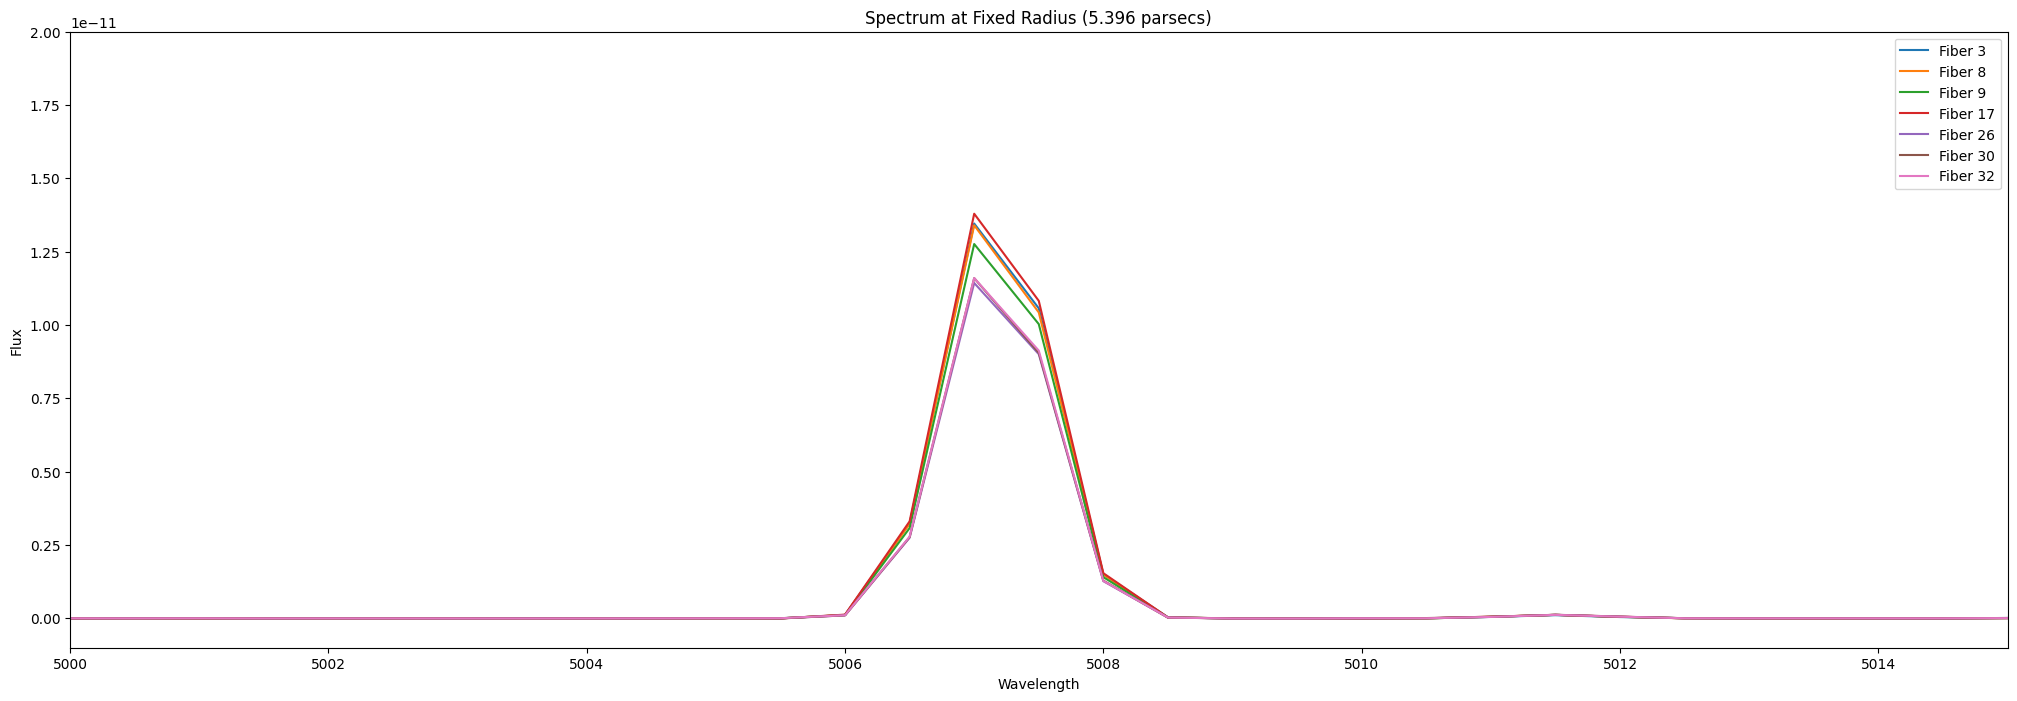

[5.05583842 5.87284264 5.50612001 4.97612199 5.82941101 5.39609004
 5.73505487]


In [4]:

# Load the FITS file
with fits.open(u.simfile) as hdu:
    header = hdu[0].header
    wave = hdu['WAVE'].data
    flux = hdu['TARGET'].data
    err = hdu['ERR'].data
    fiberdata = Table.read(hdu['FIBERID'])

#calculate the radii and convert to parsecs
# Halpha: -134.53796802734294, 30.436144784423302 

#xcen=0
#ycen=0
xcen=-27.871710752270467 
ycen=6.307154053911007

distance = 16000  # Parsecs
rad = np.sqrt((fiberdata['x'].flatten()-xcen) ** 2 + (fiberdata['y'].flatten()-ycen) ** 2) * distance * np.pi / 648000

r = np.unique(np.around(rad.value,3))


fixed_radius = r[12]

sel = np.where(np.isclose(rad.value, fixed_radius, rtol = 0.1))
#fibers at the fixed radius
fibers_at_fixed_radius = fiberdata['id'][sel]


fig, ax= plt.subplots(figsize=(25, 8))
for fiber_id in fibers_at_fixed_radius:
    ax.plot(wave, flux[fiber_id], label=f'Fiber {fiber_id}')

ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux')
ax.set_title(f'Spectrum at Fixed Radius ({fixed_radius} parsecs)')
ax.set_xlim(5000, 5015)
ax.set_ylim(-1e-12, 2e-11)
#ax.set_xlim(4350, 4370)
#ax.set_ylim(-1e-14, 1e-13)
ax.legend()
plt.show()

print(rad.value[sel])

In [5]:
#native simulation
#u.fitlines(sys_vel=20, lines0= np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim

u.fitlines(sys_vel=20, lines0= np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=False, rbinmax=260, drbin=15, loadfile=False, plot=False) #native sim


Fitting Emmission Lines: ['9532' '9069' '7319' '7320' '7330' '7331' '6731' '6716' '6584' '6563'
 '6548' '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970'
 '3729' '3726']
linefitfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_linefits.fits
169
Fitting Line: 9532.635906591086
Fitting Line: 9069.60501855587
Fitting Line: 7319.488271122552
Fitting Line: 7320.488337835371
Fitting Line: 7330.489004963561
Fitting Line: 7331.48907167638
Fitting Line: 6731.449043984956
Fitting Line: 6716.44804329267
Fitting Line: 6584.439237200558
Fitting Line: 6563.437836231357
Fitting Line: 6548.436835539072
Fitting Line: 6312.421091313779
Fitting Line: 5755.383932273573
Fitting Line: 5007.334031084932
Fitting Line: 4959.330828869618
Fitting Line: 4861.324291013352
Fitting Line: 4363.29106802947
Fitting Line: 4069.2714544606724
Fitting Line: 4076.271921450406
Fitting Line: 3970.264849891588
Fitting Line: 3729.248772102199
Fitting Line: 3726.248571963742
Fitting Line: 9532.635906

Text(0, 0.5, 'Intensity, erg s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$')

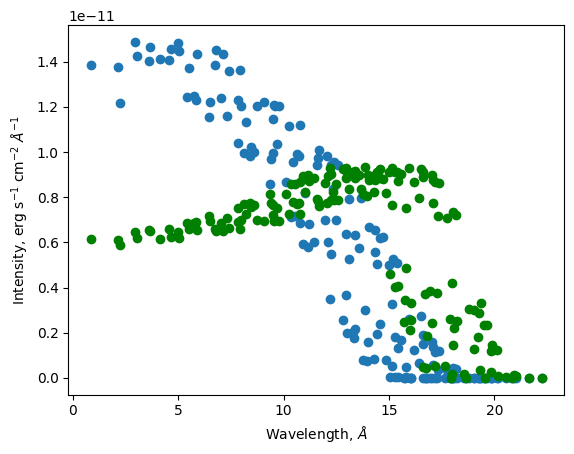

In [6]:
r = rad
plt.scatter(r.flatten(), u.linefitdict['5007_flux'])
#plt.scatter(r.flatten(), u.linefitdict['6563_flux'], color = 'red')
plt.scatter(r.flatten(), u.linefitdict['6584_flux'], color = 'green')

plt.xlabel("Wavelength, $\AA$")
plt.ylabel("Intensity, erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$")


#print(u.linefitdict['3726_flux'], u.linefitdict['3729_flux'], u.linefitdict['7319_flux'], u.linefitdict['7320_flux'], u.linefitdict['7330_flux'], u.linefitdict['7331_flux'])
#print(np.divide(u.linefitdict['7319_flux']+ u.linefitdict['7320_flux']+ u.linefitdict['7330_flux']+ u.linefitdict['7331_flux'], (u.linefitdict['3726_flux']+ u.linefitdict['3729_flux'])))


In [7]:
u.runpyneb(niter=3, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:394: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/home/amrita/LVM/lvmnebular/lvmnebular.py:424: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:441: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:455: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:473: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)

(array([65., 15.,  4., 10., 14.,  6., 18.,  6., 13., 18.]),
 array([9.12933895e-29, 1.48796688e-12, 2.97593375e-12, 4.46390063e-12,
        5.95186751e-12, 7.43983438e-12, 8.92780126e-12, 1.04157681e-11,
        1.19037350e-11, 1.33917019e-11, 1.48796688e-11]),
 <BarContainer object of 10 artists>)

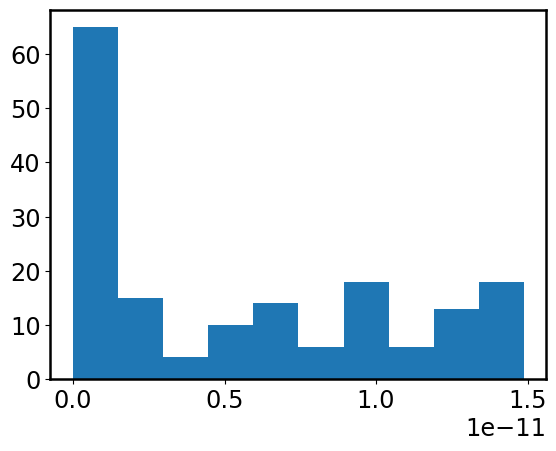

In [32]:
plt.hist(u.linefitdict['5007_flux'])

(array([31., 66., 12.,  7.,  4.,  2.,  1.,  2.,  1.,  1.]),
 array([ 4782.64864586,  6495.97816473,  8209.30768361,  9922.63720248,
        11635.96672135, 13349.29624022, 15062.62575909, 16775.95527796,
        18489.28479683, 20202.6143157 , 21915.94383457]),
 <BarContainer object of 10 artists>)

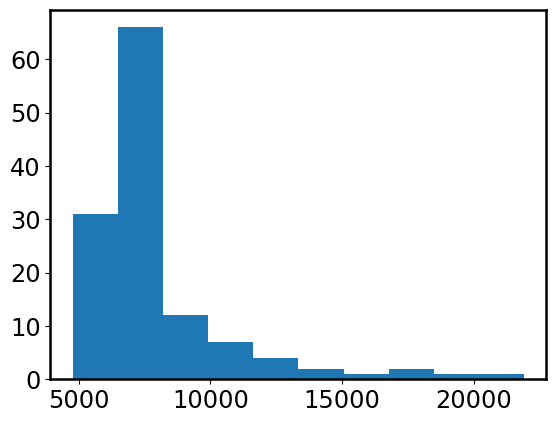

In [30]:
plt.hist(u.linefitdict['TeO3'])

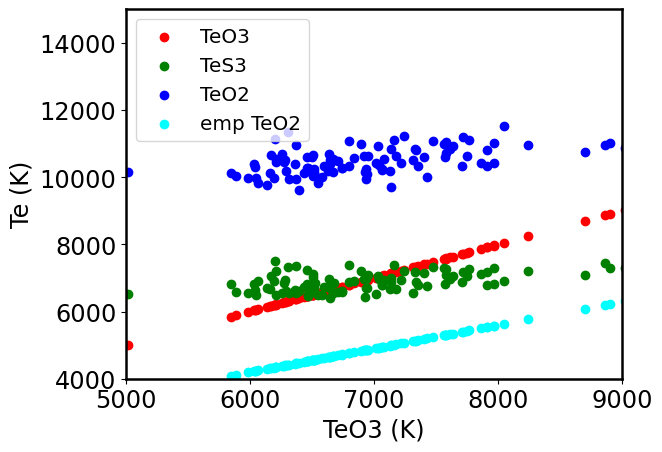

In [23]:
plt.scatter(u.linefitdict['TeO3'], u.linefitdict['TeO3'], color = 'red', label = 'TeO3')
plt.scatter(u.linefitdict['TeO3'], u.linefitdict['TeS3'], color = 'green', label = 'TeS3')
plt.scatter(u.linefitdict['TeO3'], u.linefitdict['TeO2'], color = 'blue', label = 'TeO2')
plt.scatter(u.linefitdict['TeO3'], 0.7* (u.linefitdict['TeO3']/1e4)*1e4 +0.3, color = 'cyan', label = 'emp TeO2')

plt.legend()
plt.xlim(5000, 9000)
plt.ylim(4000,15000)
plt.xlabel('TeO3 (K)')
plt.ylabel('Te (K)')
plt.show()

In [9]:
'''
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(rad, u.linefitdict['TeO3'], color = 'red', label = 'TeO3')
ax.scatter(rad, u.linefitdict['TeS3'], color = 'green', label = 'TeS3')
ax.scatter(rad, u.linefitdict['TeO2'], color = 'blue', label = 'TeO2')

emp_TeO2 = 0.7* (u.linefitdict['TeO3']/1e4)*1e4 +0.3

ax.scatter(rad, emp_TeO2, color = 'cyan', label = 'emp TeO2')

print(np.nanmean(u.linefitdict['TeO3']), np.nanmean(u.linefitdict['TeS3']), np.nanmean(emp_TeO2))

fig,  ax1 = plt.subplots(figsize=(15,8))
ax1.scatter(rad, u.linefitdict['TeO2'], color = 'red', label = 'TeO2')
ax1.scatter(rad, u.linefitdict['TeS2'], color = 'green', label = 'TeS2')
ax1.set_ylim(9000,18000)


fig, ax2 = plt.subplots(figsize=(15,8))
ax2.scatter(u.linefitdict['TeO2'], u.linefitdict['TeS2'])
ax2.set_xlim(9000,15000)
ax2.set_ylim(9500,15000)

ax.legend()
ax1.legend()

#ax.set_xlim(5000, 9000)
ax.set_ylim(5000,15000)
ax.set_xlabel('Radius (pc)')
ax.set_ylabel('Te (K)')

ax2.set_xlabel('TeO2 (K)')
ax2.set_ylabel('TeS2 (K)')

plt.show()
'''

"\nfig, ax = plt.subplots(figsize=(15,8))\n\nax.scatter(rad, u.linefitdict['TeO3'], color = 'red', label = 'TeO3')\nax.scatter(rad, u.linefitdict['TeS3'], color = 'green', label = 'TeS3')\nax.scatter(rad, u.linefitdict['TeO2'], color = 'blue', label = 'TeO2')\n\nemp_TeO2 = 0.7* (u.linefitdict['TeO3']/1e4)*1e4 +0.3\n\nax.scatter(rad, emp_TeO2, color = 'cyan', label = 'emp TeO2')\n\nprint(np.nanmean(u.linefitdict['TeO3']), np.nanmean(u.linefitdict['TeS3']), np.nanmean(emp_TeO2))\n\nfig,  ax1 = plt.subplots(figsize=(15,8))\nax1.scatter(rad, u.linefitdict['TeO2'], color = 'red', label = 'TeO2')\nax1.scatter(rad, u.linefitdict['TeS2'], color = 'green', label = 'TeS2')\nax1.set_ylim(9000,18000)\n\n\nfig, ax2 = plt.subplots(figsize=(15,8))\nax2.scatter(u.linefitdict['TeO2'], u.linefitdict['TeS2'])\nax2.set_xlim(9000,15000)\nax2.set_ylim(9500,15000)\n\nax.legend()\nax1.legend()\n\n#ax.set_xlim(5000, 9000)\nax.set_ylim(5000,15000)\nax.set_xlabel('Radius (pc)')\nax.set_ylabel('Te (K)')\n\nax2.se

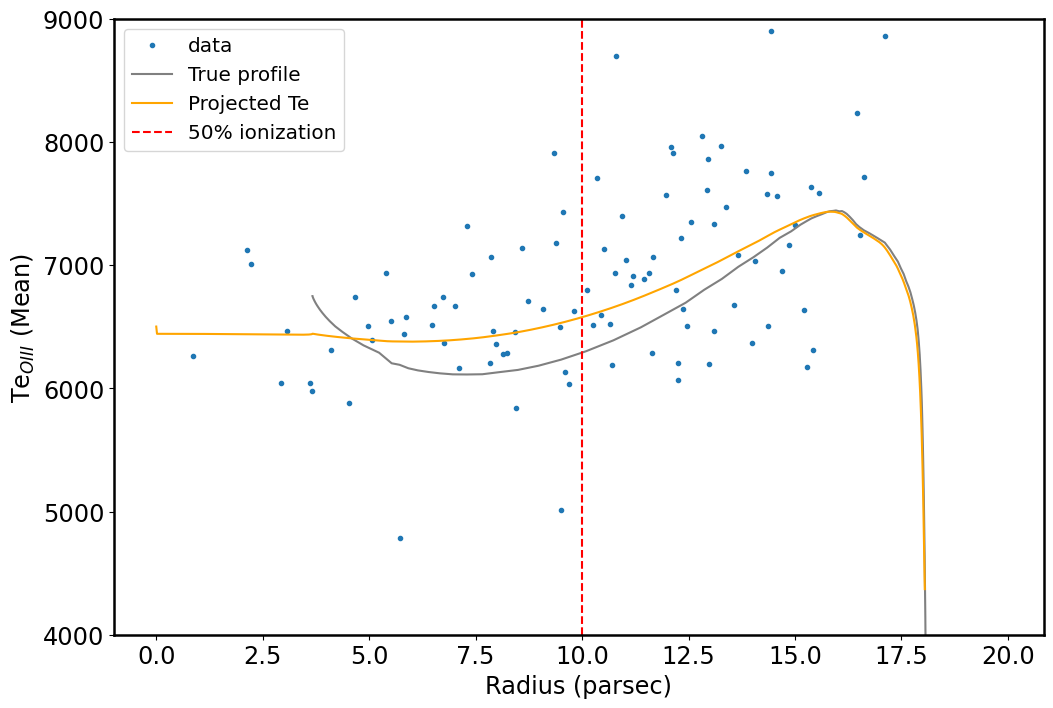

In [22]:
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], u.vals[6],   4000, 9000, 10.0, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=False,  snbin=False)

In [11]:
print(np.nanmean(u.linefitdict['TeO3']), np.nanmean(u.linefitdict['TeO3err']), np.nanmean(u.linefitdict['TeS3']), np.nanmean(u.linefitdict['TeN2']), np.nanmean(u.linefitdict['neO2']), np.nanmean(u.linefitdict['neS2']), np.nanmean(u.linefitdict['TeO2']))

8014.1622972865425 507.519559713514 8112.399920894442 7893.64052126877 149.14980754113705 86120.80727455308 11105.454356682305


In [12]:

#n = 6
#frac = np.linspace(6*10**(-2), 1, n)
#for i in frac:
#
#    Amp =  np.linspace(0.05, 0.3, n)
#    for j in Amp:

        #u.chi('pert_'+str(i)+'_'+str(j)+'_Bubble_v2_1e-8','Bubble_v2_1e-8')

#u.chi('pert_0.06_0.3_Bubble_v2_1e-8','Bubble_v2_1e-8')
#print()
#print('Chi_TeN:', u.Chi_TeN, 'Chi_TeS:', u.Chi_TeS, 'Chi_TeO:', u.Chi_TeO)
#
#plt(r, u.Chi_TeN)

#with fits.open('./pert_0.06_0.1_Bubble_v2_1e-8/pert_0.06_0.1_Bubble_v2_1e-8 diag_Temp_Den.fits') as hdul:
#        Te = hdul[1].data
#print(np.nanmean(Te['TeO3']), np.nanmean(Te['TeO3err']))


ADF [OIII]: 0.16688794848627642
ADF [SIII]: 0.9694620050978863
ADF [NII]: 26.999055015830198


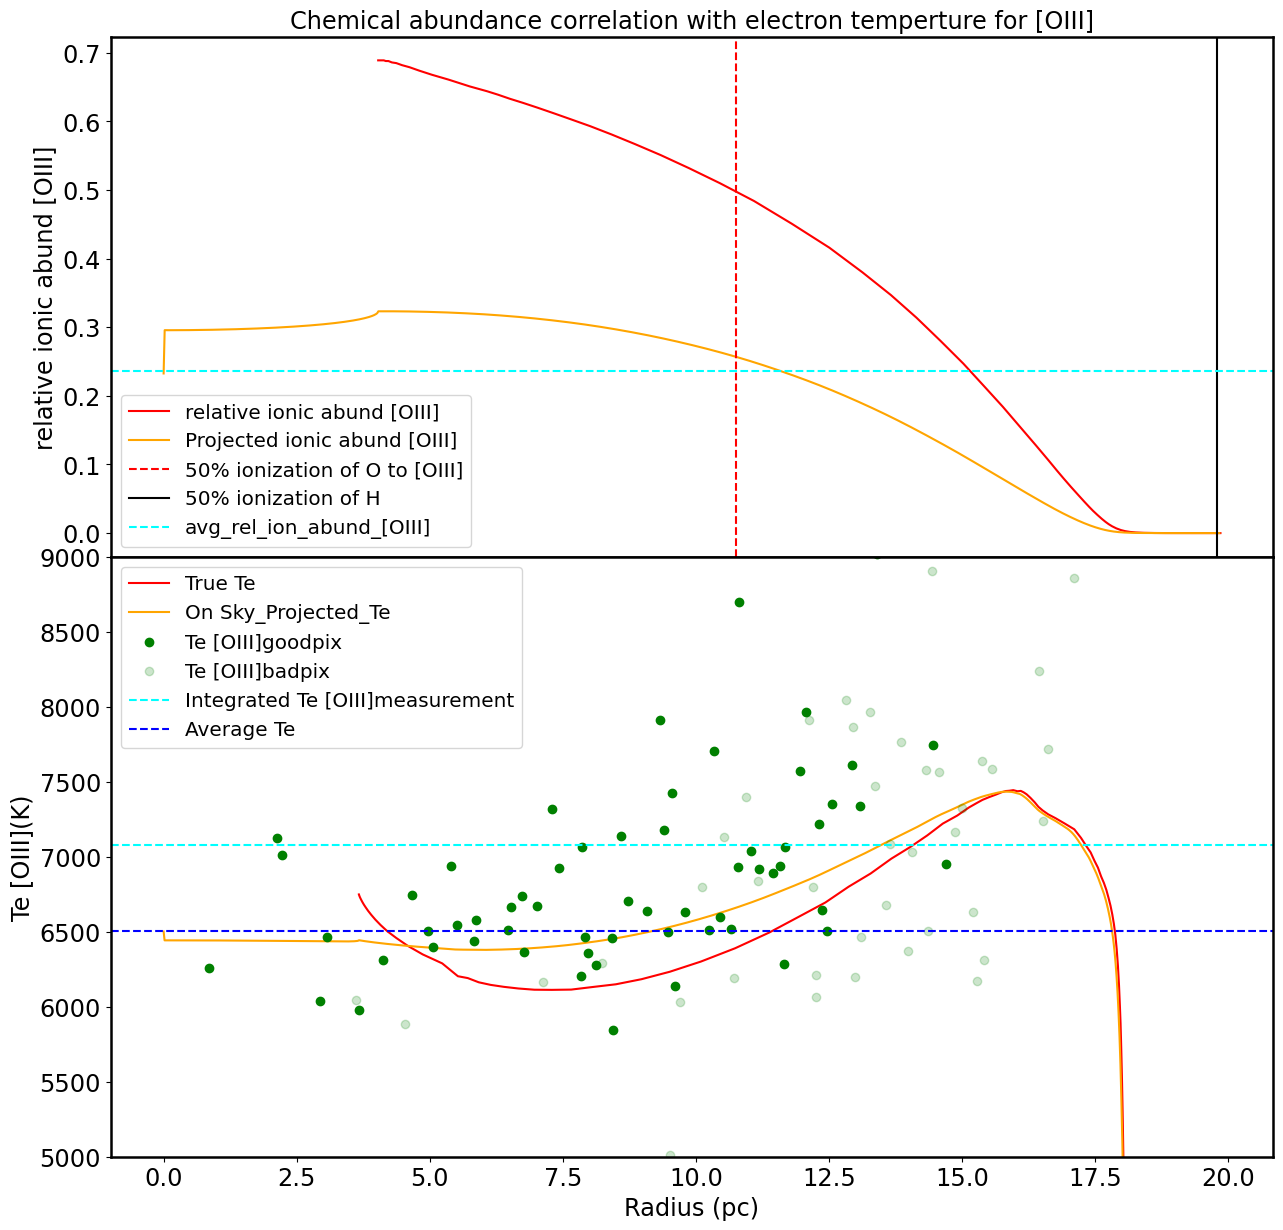

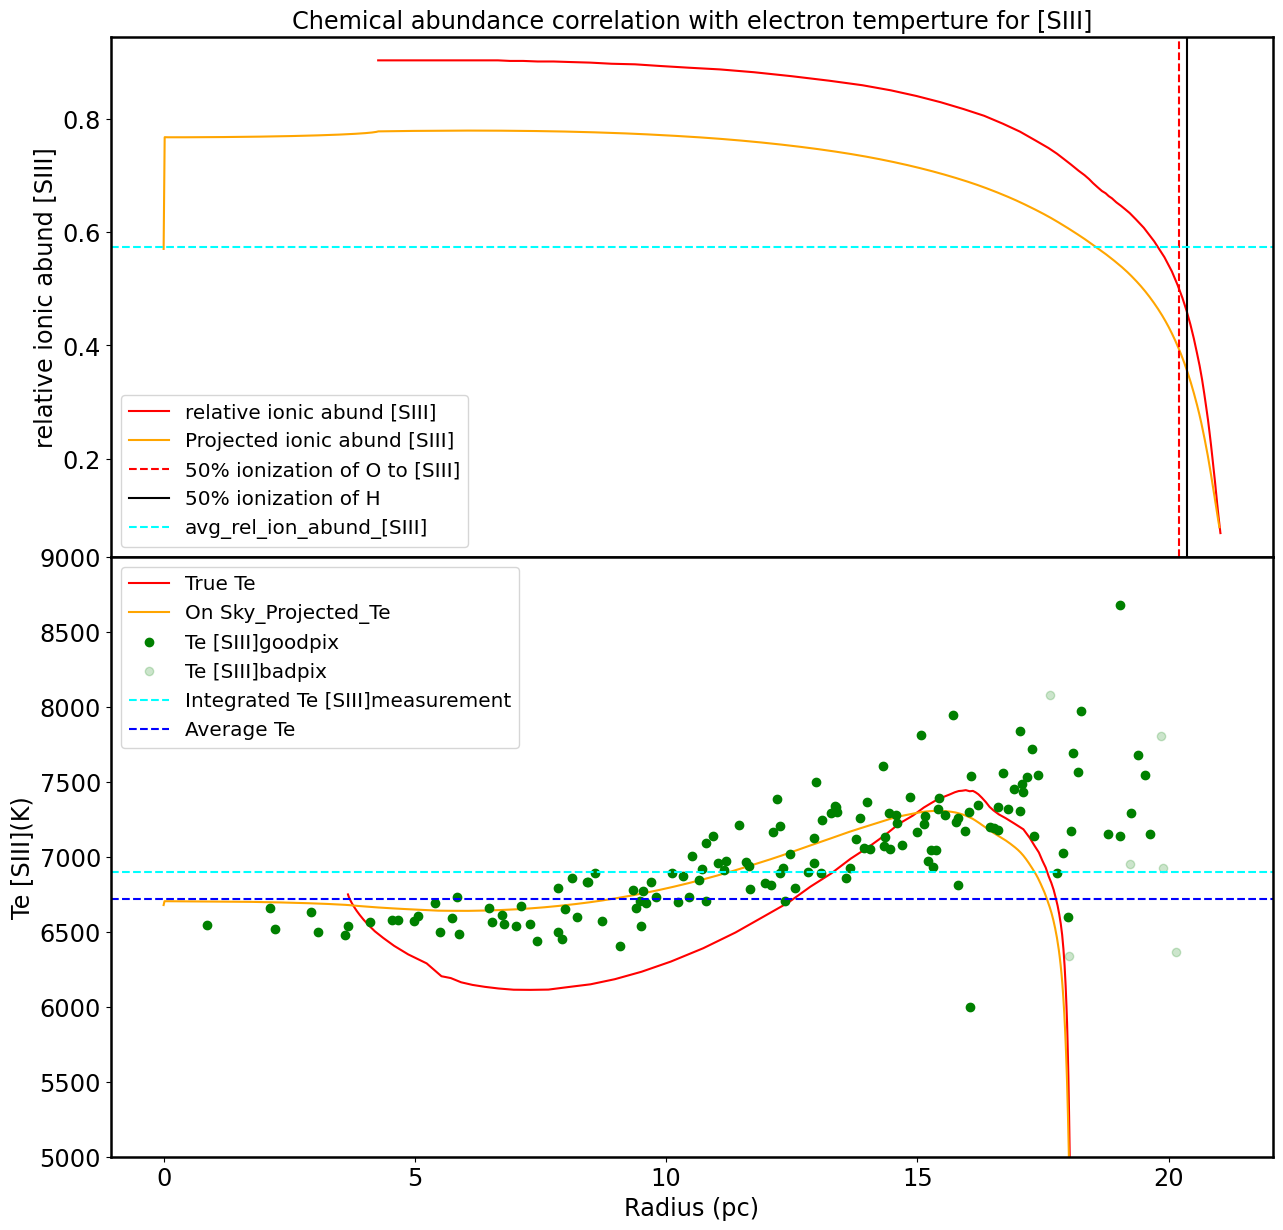

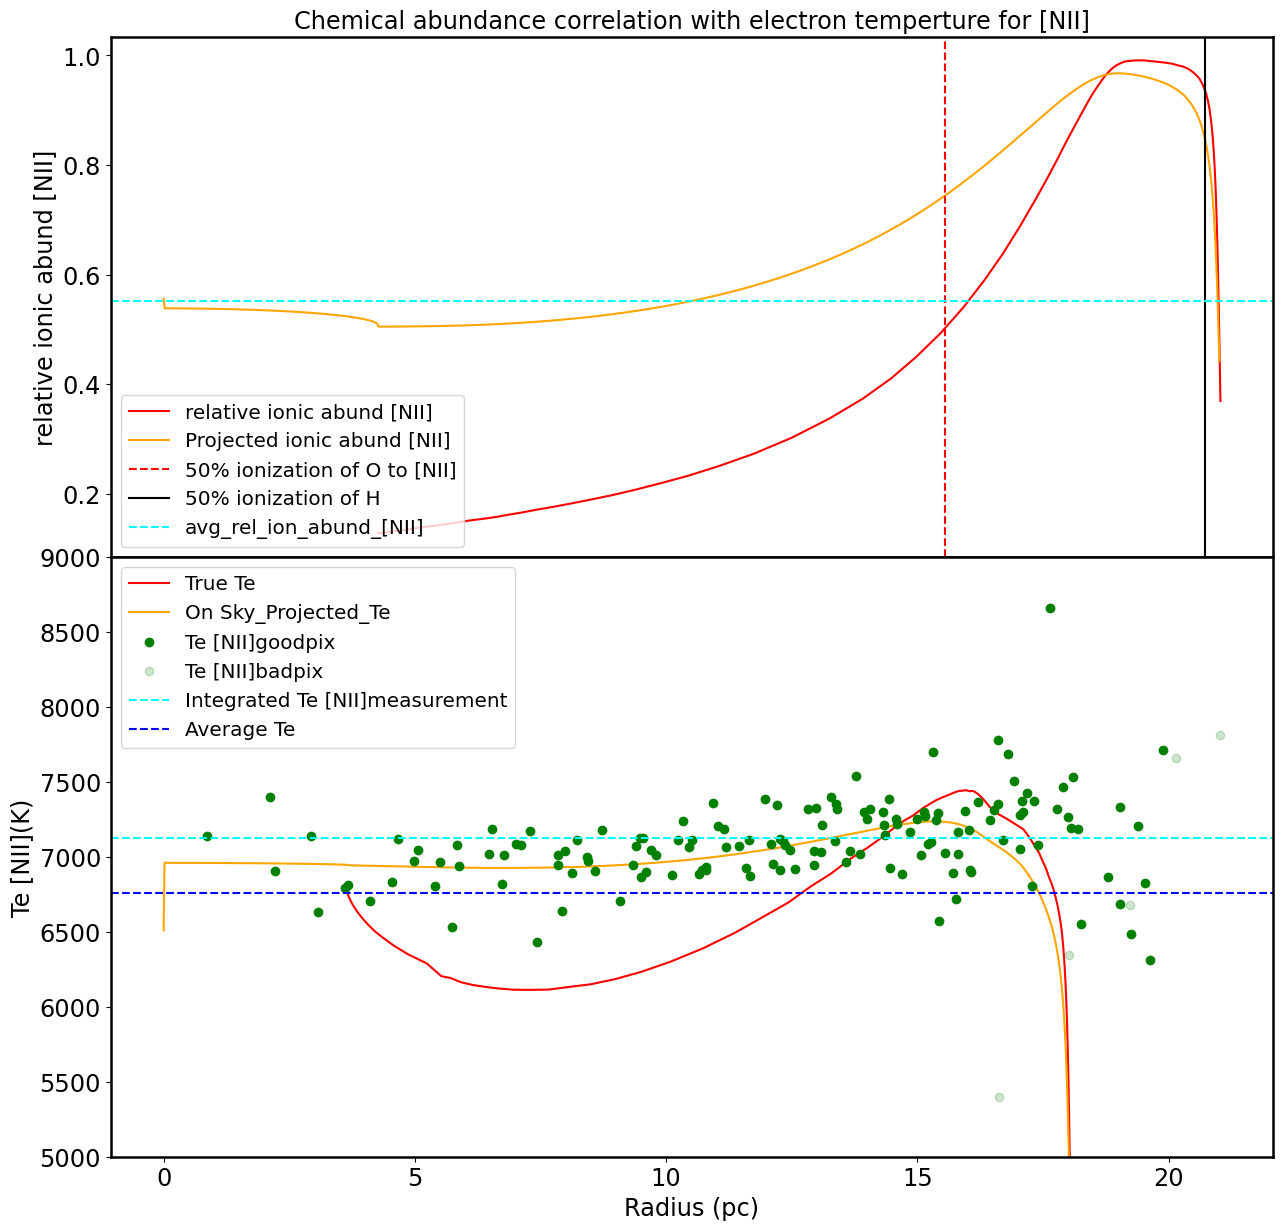

In [13]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#rad2 =18 mostly 0r 17.8

#rad1 = ([OIII]:11.2, [OII]:11.2, [NII]:13.8, [SIII]:17.6, [SII]: 17.6) -------- z=0.5
#rad1 = ([OIII]:9.78, [OII]:9.78, [NII]:13.36, [SIII]:17.35, [SII]: 17.35) -------- z=1
#rad1 = ([OIII]:11.92, [OII]:11.92, [NII]:14.15, [SIII]:17.5, [SII]: 17.5) -------- z=0.2
#rad1 = ([OIII]:11.17, [OII]:11.17, [NII]:13.83, [SIII]:17.5, [SII]: 17.5) -------- z=0.4
#rad1 = ([OIII]:10.75, [OII]:10.75, [NII]:13.65, [SIII]:17.41, [SII]: 17.41) -------- z=0.6
#rad1 = ([OIII]:10.26, [OII]:10.26, [NII]:13.44, [SIII]:17.33, [SII]: 17.33) -------- z=0.8

#log_ion_sun = -3.31 ----[O]
#log_ion_sun = -4.17 ----[N]
#log_ion_sun = -4.88 ----[S]

z1 = 1

#[OII]
#line = 3726    
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeO2'], u.vals[5], u.int_TO2, u.int_OpH, u.OpH, u.Abund_O2,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 10, rad2 = 17.8, label = '[OII]', outfilename = 'O2_Te_chem_abund_vs_R.png')

#[OIII]
line = 4363  
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeO3'], u.vals[6], u.int_TO3, u.int_OppH, u.OppH, u.Abund_O3,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 9.78, rad2 = 18, label = '[OIII]', outfilename = 'O3_Te_chem_abund_vs_R.png')

#[SII]
#line = 6716   
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeS2'], u.vals[11], u.int_TS2, u.int_SpH, u.SpH, u.Abund_S2,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.35, rad2 = 17.8, label = '[SII]', outfilename = 'S2_Te_chem_abund_vs_R_present.png')

#[SIII]
line = 6312  
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeS3'], u.vals[12], u.int_TS3, u.int_SppH, u.SppH, u.Abund_S3,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.35, rad2 = 17.5, label = '[SIII]', outfilename = 'S3_Te_chem_abund_vs_R_present.png')

##[NII]
line = 5755   
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeN2'], u.vals[8], u.int_TN2, u.int_NpH, u.NpH, u.Abund_N2,  testline = np.array(line), z = z1, log_ion_sun = -4.17, rad1 = 13.36, rad2 = 17.8, label = '[NII]', outfilename = 'N2_Te_chem_abund_vs_R_present.png')

/home/amrita/LVM/lvmnebular/lvmnebular.py:806: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:807: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(neaux*np.cos(theta)**(-2), x=theta)


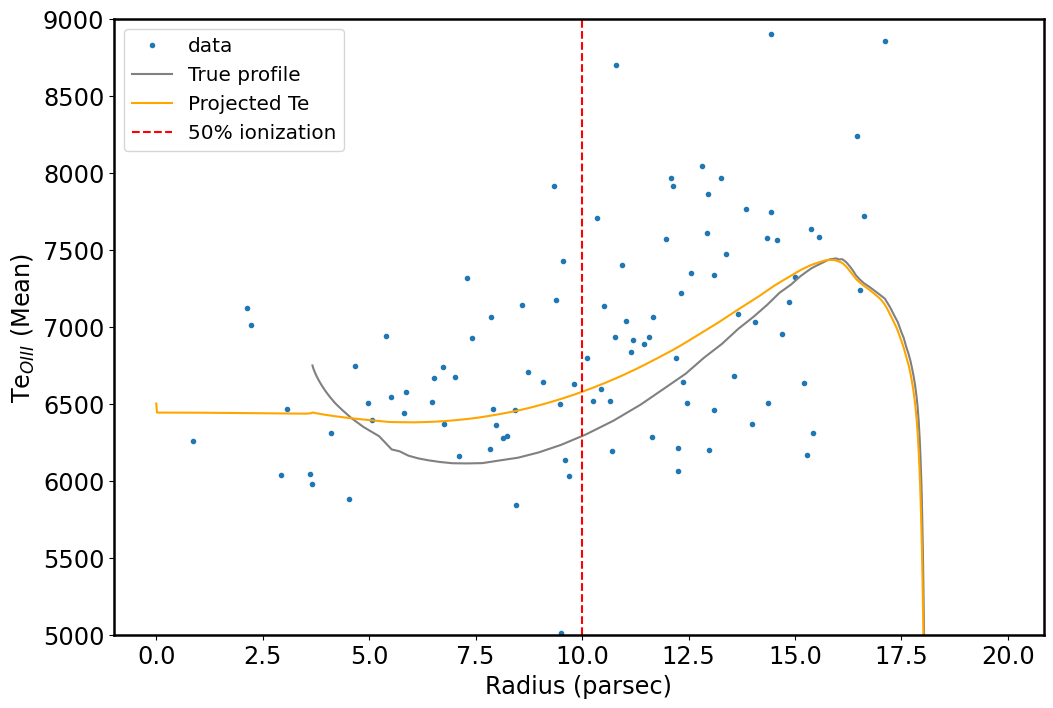

In [20]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#def overplotprofile(self, z, val1, val2, min, max, x, n, title='line_map', output='line_map', radbin=False, vorbin=False, snbin=False, pertsim=False)

#u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], u.vals[8],  5000 , 9000, 13.8, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], u.vals[11], 5000 , 15000, 17.8, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], u.vals[12], 5000 , 9000, 17.8, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], u.vals[6],   5000, 9000, 10.0, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neO2'], u.vals[2], u.vals[5],  10 , 200,    10.0, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neS2'], u.vals[2], u.vals[11], 50 , 180,   17.8, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], u.vals[5],  5000 , 15000,10.0, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, vorbin=False,  snbin=False)

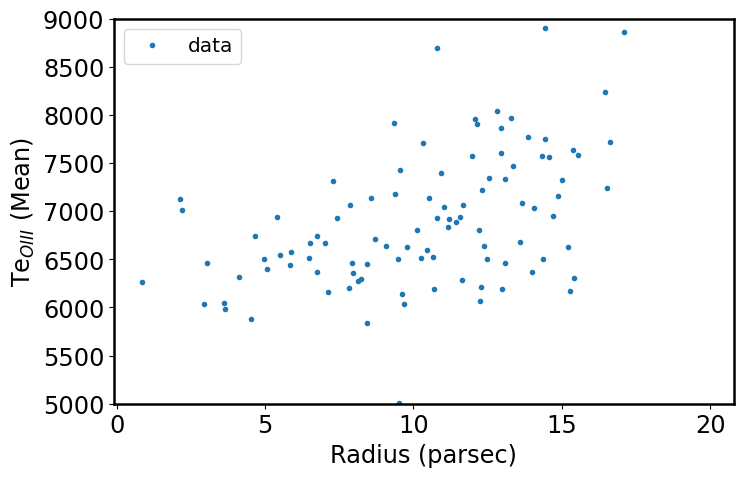

In [21]:
#MakeRadialbin plot profiles
#u.plotprofile(u.linefitdict['TeN2'], 5000 , 9000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeS3'], 5000 , 9000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 5000 , 9000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeS2'], 5000 , 15000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeO2'], 8000 , 12000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['neS2'], 100 , 180, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, snbin=False)


-23.842205232069393 11.777285924657479


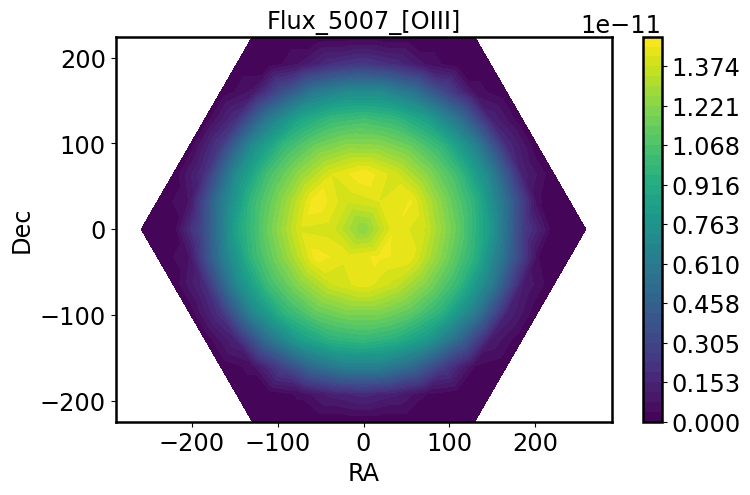

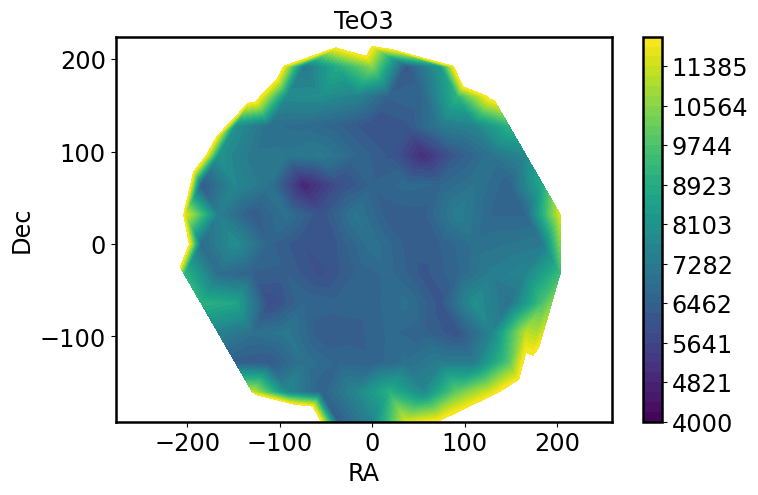

In [40]:
#Make plot profiles
#u.plotmap(u.linefitdict['4363_flux'], np.min(u.linefitdict['4363_flux']) , np.max(u.linefitdict['4363_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_4363_[OIII]', output='4363_flux',   vorbin=False)
u.plotmap(u.linefitdict['5007_flux'], np.min(u.linefitdict['5007_flux']) , np.max(u.linefitdict['5007_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_5007_[OIII]', output='5007_flux',   vorbin=False)
#u.plotmap(u.linefitdict['5755_flux'], np.min(u.linefitdict['5755_flux']) , np.max(u.linefitdict['5755_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_5755_[NII]', output='5755_flux',   vorbin=False)
#u.plotmap(u.linefitdict['6312_flux'], np.min(u.linefitdict['6312_flux']) , np.max(u.linefitdict['6312_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_6312_[SIII]', output='6312_flux',   vorbin=False)

u.plotmap(u.linefitdict['TeO3'], 4000 , 12000,  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='TeO3', output='TeO3',   vorbin=False)


#u.plotmap(u.linefitdict['TeN2'], 6000 , 8000,  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{NII}$ (Mean)', output='TeN2',   vorbin=False)
#u.plotmap(u.linefitdict['TeS2'], 5000 , 18000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{SII}$ (Mean)', output='TeS2',   vorbin=False)
#u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{SIII}$ (Mean)', output='TeS3', vorbin=False)
#u.plotmap(u.linefitdict['TeO3'], 4000 , 8000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{OIII}$ (Mean)', output='TeO3', vorbin=False)
#u.plotmap(u.linefitdict['neO2'], 10 , 200,     table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'ne$_{OII}$ (Mean)', output='neO2',      vorbin=False)
#u.plotmap(u.linefitdict['neS2'], 100 , 250,    table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'ne$_{SII}$ (Mean)', output='neS2',   vorbin=False)
#u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{OII}$ (Mean)', output='TeO2',  vorbin=False)



censel=rad.value<5
myx=fiberdata['x'].flatten()[censel]
myy=fiberdata['y'].flatten()[censel]
myflux4959=u.linefitdict['4959_flux'][censel]
myflux5007=u.linefitdict['5007_flux'][censel]
myflux6563=u.linefitdict['6563_flux'][censel]

xcen=np.sum(myx*myflux5007)/np.sum(myflux5007)
ycen=np.sum(myy*myflux5007)/np.sum(myflux5007)
print(xcen, ycen)

#u.plotmap(u.linefitdict['5007_flux']/u.linefitdict['6563_flux'], 0 , 2, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits')
#plt.show() 5007: -23.842205232069393 11.777285924657479, 6563: -24.33583539572649 12.06519326752147

#sely=(np.abs(myy)<0.1)
#
#plt.plot(myx[sely], (myflux4959)[sely], 'o')
#plt.plot(myx[sely], (myflux5007)[sely], 'o')
##plt.plot(myx, myflux6563, '.')
#plt.show()
#plt.plot(myx, myy, 'o')

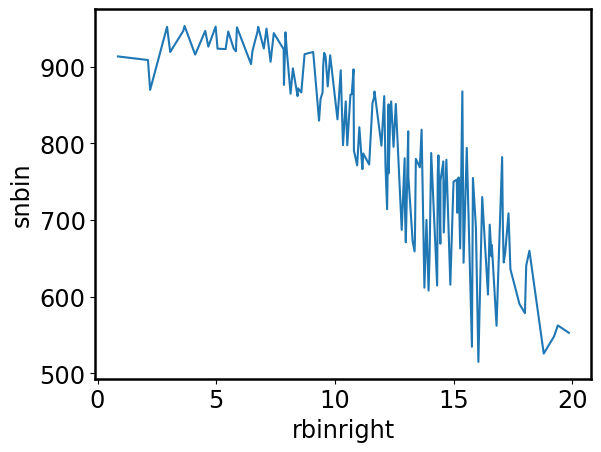

In [17]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
#print(u.snbinned_flux, u.flux)

86
[[ 1.79779253e-14 -1.02568660e-14  1.46277033e-14 ...  1.16632308e-15
   5.68943179e-15 -1.68513531e-15]
 [ 2.53726127e-14 -5.70844387e-15  4.39320923e-15 ... -3.57332030e-15
   9.01335128e-15  5.97478957e-15]
 [ 1.24216323e-14 -1.67245512e-15  1.77370139e-15 ... -4.48027828e-15
  -1.18285297e-14  1.40343693e-15]
 ...
 [ 4.72761148e-15  3.10144650e-15 -3.74117309e-14 ...  1.01827760e-15
  -1.03858428e-14  1.82068207e-14]
 [ 4.10830868e-14  1.23826493e-14  2.52351579e-14 ...  8.38228887e-16
   2.09980552e-14 -4.35436328e-14]
 [-4.63834835e-14 -3.56251656e-14 -1.99314306e-14 ... -1.57049798e-15
   5.44765259e-15 -1.45588277e-14]]


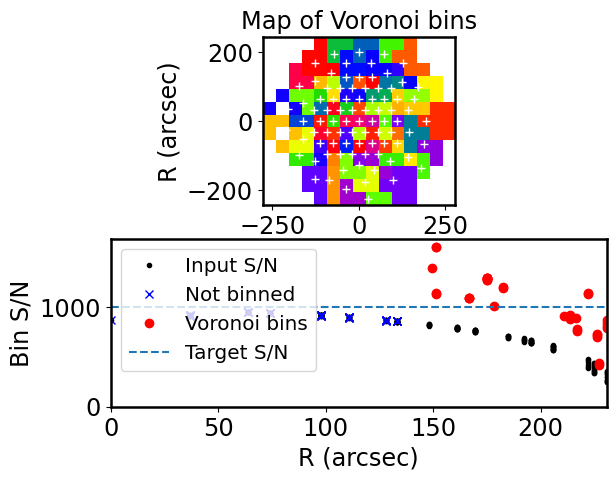

In [18]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [19]:
simname = 'pert_0.248_0.05_Bubble_v2_1e-8'

with fits.open('./Perturbation/cube_4D_cart.fits') as hdul:
     data=hdul[0].data

with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
    vals=hdu['Comp_0_PhysParams'].data
    e_5007 = hdu['COMP_0_FLUX_5006.84'].data
    print(np.mean(e_5007), e_5007.shape, vals[0].shape)
 
chi = 6.626e-24*299792485/5006.84

Lc = e_5007*chi/100

hdu=fits.PrimaryHDU(data = Lc)
hdu.writeto('./'+simname+'/pert_0.248_0.05_cooling_rate_cube.fits', overwrite='True')

FileNotFoundError: [Errno 2] No such file or directory: '/home/amrita/LVM/lvmnebular/pert_0.248_0.05_Bubble_v2_1e-8/testneb_tutorial3_ex1.fits'

In [ ]:
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 


R  = u.vals[0]
T0 = u.vals[1]
ne = u.vals[2]
a  = u.vals[5]

R  = R [1:]
T0 = T0[1:]
ne = ne[1:]
a  = a [1:]

cubic_interp_T0 = interp1d(R, T0, kind='cubic', axis=-1, bounds_error=False)
cubic_interp_ne = interp1d(R, ne, kind='cubic', axis=-1, bounds_error=False)
cubic_interp_a = interp1d(R, a, kind='cubic', axis=-1, bounds_error=False)

r0aux=rad
T0aux=cubic_interp_T0(r0aux)
aaux=cubic_interp_a(r0aux)
neaux=cubic_interp_ne(r0aux)

plt.scatter(u.linefitdict['TeN2'], (T0aux*neaux*aaux)/(neaux*aaux))

print(np.sum(T0aux*neaux*aaux)/np.sum(neaux*aaux))
plt.hlines(np.sum(T0aux*neaux*aaux)/np.sum(neaux*aaux), xmin = 5000, xmax = 8000, colors= 'red')
print(r0aux.shape, R.shape, T0aux.shape)

plt.xlim(5000, 8000)
#plt.ylim(6000, 8000)
plt.show()


plt.scatter(r0aux, (T0aux*neaux*aaux)/(neaux*aaux))
plt.plot(u.vals[0], u.vals[1])

plt.xlim(0, 20)
plt.ylim(5000, 8500)

NameError: name 'unit' is not defined

In [ ]:
import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

with fits.open('./Bubble_v2_5e-14/Bubble_v2_5e-14 diag_Temp_Den.fits')as hdul1:
    data3 = hdul1[1].data

with fits.open('./pert_0.5_0.8_Bubble_v2_5e-14/pert_0.5_0.8_Bubble_v2_5e-14 diag_Temp_Den.fits')as hdul1:
    data5 = hdul1[1].data

#print(np.nanmean(data['TeO3']), np.nanmean(data1['TeO3']), rad)

plt.scatter(rad, data3['TeO3'], color = 'green')
plt.scatter(rad, data5['TeO3'], color = 'blue')
plt.plot(u.vals[0], u.vals[1])
plt.ylim(5000, 10000)

plt.show()

In [ ]:
#print(r.value)

meanerr=np.zeros(len(r))
stdflux=np.zeros(len(r))

O3R=u.linefitdict['4363_flux']/(u.linefitdict['5007_flux'])

for i in range(len(r)):
    fixed_radius = r[i]

    sel = np.where(np.isclose(rad.value.flatten(), fixed_radius, rtol = 0.01))
    #selA=O3R[sel]
    #selAerr=O3R[sel]
    selA=u.linefitdict['5007_flux'][sel]
    selAerr=u.linefitdict['5007_flux_err'][sel]
    #selA=u.linefitdict['TeO3'][sel]
    #selAerr=u.linefitdict['TeO3err'][sel]
    meanerr[i]=np.nanmean(selAerr)
    stdflux[i]=np.nanstd(selA)

    if i==12:
        print(sel)
        print(selA)
        print(selAerr)
        print(meanerr[i], stdflux[i])


plt.plot(r, meanerr, color='red')
plt.plot(r, stdflux, color='green')
plt.show()

plt.plot(r, stdflux/meanerr)
plt.ylim(0,250)
plt.show()


plt.plot(rad.value,u.linefitdict['5007_flux'],'.')
plt.show()